In [5]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

In [6]:
store = []
sido = []
gungu = []
condition = []
store_address = []
number = []

for i in range(56):

    url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo={}&sido=&gugun=&store='
    full_url = url.format(i+1)
    html = urlopen(full_url) 
    soup = BeautifulSoup(html,'html.parser') 
    list_soup =soup.find_all('tr', attrs={'class':''})[1:11]
    for item in list_soup:
    
        tmp_string = item.get_text()
        store.append(re.split('\r\n|\n', tmp_string)[2])
        sido.append(item.get_text().split()[0])
        gungu.append(item.get_text().split()[1])
        condition.append(re.split('\r\n|\n', tmp_string)[3])
        store_address.append(re.split('\r\n|\n', tmp_string)[4])
        number.append(item.get_text().split()[-1])

In [7]:
len(store),len(sido),len(gungu),len(condition),len(store_address),len(number)

(560, 560, 560, 560, 560, 560)

In [8]:
import pandas as pd

In [9]:
data = {'sotre' : store, 'sido' : sido, 'gungu' : gungu, 'store_address' : store_address, 'condition' : condition, 'number' : number}
hollys = pd.DataFrame(data)
hollys.head()

,sotre,sido,gungu,store_address,condition,number
0,부천심곡점,경기,부천시,경기도 부천시 장말로 376 심곡동 355-1,영업중,032-612-7258
1,성남터미널점,경기,성남시,"경기도 성남시 분당구 성남대로925번길 16, 성남종합버스터미널 1층",영업중,031-725-1004
2,부산백양대로점,부산,사상구,괘법동 141,영업중,051-311-5399
3,왕십리역점,서울,성동구,"성동구 왕십리광장로 17 (행당동 168-151 ), 비트플렉스몰 3층",영업중,02-2200-1303
4,홍대출판사거리점,서울,마포구,"서울시 마포구 독막로7길 40, 1층",영업중,02-332-3567


In [10]:
import csv

In [11]:
hollys.to_csv("HOLLYS.csv", mode='w')       
##cvs파일 저장완료

In [12]:
count = hollys.condition.value_counts()
count      
## 오픈예정 : 2개

영업중     457
        102
오픈예정      1
Name: condition, dtype: int64

In [13]:
group = hollys['gungu'].groupby(hollys['sido']).value_counts()
group.head()

sido  gungu
강원    원주시      7
      강릉시      2
      동해시      2
      홍천군      2
      속초시      1
Name: gungu, dtype: int64

In [14]:
group1 = group.to_frame('group').reset_index()
group1.head()

,sido,gungu,group
0,강원,원주시,7
1,강원,강릉시,2
2,강원,동해시,2
3,강원,홍천군,2
4,강원,속초시,1


In [15]:
group1.columns = ['sido', 'gungu', 'counts']
group1.head()

,sido,gungu,counts
0,강원,원주시,7
1,강원,강릉시,2
2,강원,동해시,2
3,강원,홍천군,2
4,강원,속초시,1


In [16]:
group1.sort_values(by='counts',ascending= False).head(20)

,sido,gungu,counts
9,경기,수원시,18
87,서울,강남구,17
136,전북,전주시,16
88,서울,서초구,14
152,충북,청주시,13
89,서울,종로구,12
10,경기,성남시,11
11,경기,화성시,11
90,서울,영등포구,10
91,서울,중구,10


In [17]:
group2 = group1.sort_values(by='counts',ascending= False).head(20)

In [18]:
group2.head()

,sido,gungu,counts
9,경기,수원시,18
87,서울,강남구,17
136,전북,전주시,16
88,서울,서초구,14
152,충북,청주시,13


In [19]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '구군별 가맹점 갯수')

D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 443

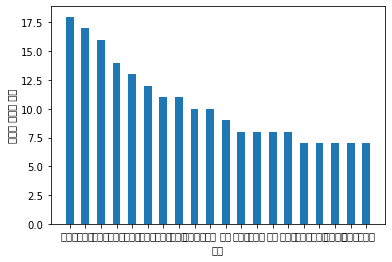

In [20]:
plt.bar(group2.gungu, group2.counts, width = 0.5)   
plt.xlabel('구군')
plt.ylabel('구군별 가맹점 갯수')
##구군별 상위 20 개의 막대그래프